<a href="https://colab.research.google.com/github/Tamaghnatech/BankCustomerRetention/blob/main/Bank_Churn_Kaggle_Competetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
dataset = pd.read_csv('Churn_Modelling.csv')


In [6]:
# Display the first few rows of the dataset
print(dataset.head())

# Summary statistics and info
print(dataset.describe())
print(dataset.info())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4      

In [7]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['HasCrCard'].fillna(dataset['HasCrCard'].mode()[0], inplace=True)
dataset['IsActiveMember'].fillna(dataset['IsActiveMember'].mode()[0], inplace=True)
dataset['Geography'].fillna(dataset['Geography'].mode()[0], inplace=True)


In [8]:
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [9]:
# Performing one-hot encoding on 'Geography' and 'Gender'
dataset = pd.get_dummies(dataset, columns=['Geography', 'Gender'])

# Display the first few rows to confirm changes
print(dataset.head())


   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619  42.0       2       0.00              1        1.0   
1          608  41.0       1   83807.86              1        0.0   
2          502  42.0       8  159660.80              3        1.0   
3          699  39.0       1       0.00              2        0.0   
4          850  43.0       2  125510.82              1        1.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1.0        101348.88       1                 1   
1             1.0        112542.58       0                 0   
2             0.0        113931.57       1                 1   
3             0.0         93826.63       0                 1   
4             1.0         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            

In [11]:
from sklearn.preprocessing import StandardScaler
# List of numeric features to be scaled
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the numeric features
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

# Display the first few rows to confirm changes
print(dataset.head())


   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326465  0.293500 -1.041728 -1.226009      -0.911597   0.646000   
1    -0.440270  0.198136 -1.387530  0.117274      -0.911597  -1.547987   
2    -1.536934  0.293500  1.033084  1.333054       2.527132   0.646000   
3     0.501205  0.007409 -1.387530 -1.226009       0.807768  -1.547987   
4     2.063434  0.388864 -1.041728  0.785694      -0.911597   0.646000   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0        0.970443         0.022008       1                 1   
1        0.970443         0.216663       0                 0   
2       -1.030458         0.240817       1                 1   
3       -1.030458        -0.108802       0                 1   
4        0.970443        -0.365171       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0              

In [12]:
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])


In [16]:
print(dataset.columns)


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')


In [17]:
# List of numeric features to be scaled
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create a StandardScaler object
scaler = StandardScaler()

# Apply the scaler to the numeric features
dataset[numeric_features] = scaler.fit_transform(dataset[numeric_features])

# Display the first few rows to confirm changes
print(dataset.head())


   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326465  0.293500 -1.041728 -1.226009      -0.911597   0.646000   
1    -0.440270  0.198136 -1.387530  0.117274      -0.911597  -1.547987   
2    -1.536934  0.293500  1.033084  1.333054       2.527132   0.646000   
3     0.501205  0.007409 -1.387530 -1.226009       0.807768  -1.547987   
4     2.063434  0.388864 -1.041728  0.785694      -0.911597   0.646000   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0        0.970443         0.022008       1                 1   
1        0.970443         0.216663       0                 0   
2       -1.030458         0.240817       1                 1   
3       -1.030458        -0.108802       0                 1   
4        0.970443        -0.365171       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0              

In [21]:

# Features (excluding the target variable)
X = dataset.drop('Exited', axis=1)

# Target variable
y = dataset['Exited']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import confusion_matrix


In [26]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1599
           1       0.74      0.48      0.58       402

    accuracy                           0.86      2001
   macro avg       0.81      0.72      0.75      2001
weighted avg       0.85      0.86      0.85      2001

[[1532   67]
 [ 210  192]]
Accuracy: 0.8615692153923038


In [27]:
# Generating probabilities
# The second column ([ :, 1]) corresponds to the probability of 'Exited' being 1
probabilities = model.predict_proba(X_test)[:, 1]


In [30]:
print(dataset)

       CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0        -0.326465  0.293500 -1.041728 -1.226009      -0.911597   0.646000   
1        -0.440270  0.198136 -1.387530  0.117274      -0.911597  -1.547987   
2        -1.536934  0.293500  1.033084  1.333054       2.527132   0.646000   
3         0.501205  0.007409 -1.387530 -1.226009       0.807768  -1.547987   
4         2.063434  0.388864 -1.041728  0.785694      -0.911597   0.646000   
...            ...       ...       ...       ...            ...        ...   
9997      0.604664 -0.278683  0.687282 -1.226009      -0.911597  -1.547987   
9998      1.256455  0.293500 -0.695926 -0.022693       0.807768   0.646000   
9999      1.256455  0.293500 -0.695926 -0.022693       0.807768   0.646000   
10000     1.463373 -1.041594 -0.350124  0.859935      -0.911597   0.646000   
10001     1.463373 -1.041594 -0.350124  0.859935      -0.911597   0.646000   

       IsActiveMember  EstimatedSalary  Exited  Geography_Franc

In [36]:
# Exclude the 'Exited' column when making predictions
X_test = dataset.drop('Exited', axis=1)

# Generate predictions or probabilities for the test dataset
test_probabilities = model.predict_proba(X_test)[:, 1]



In [37]:
# Create the submission DataFrame
submission = pd.DataFrame({
    'Exited': test_probabilities
})

# If you need to add an index as an ID column
submission.reset_index(inplace=True)
submission.rename(columns={'index': 'id'}, inplace=True)

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)


In [38]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

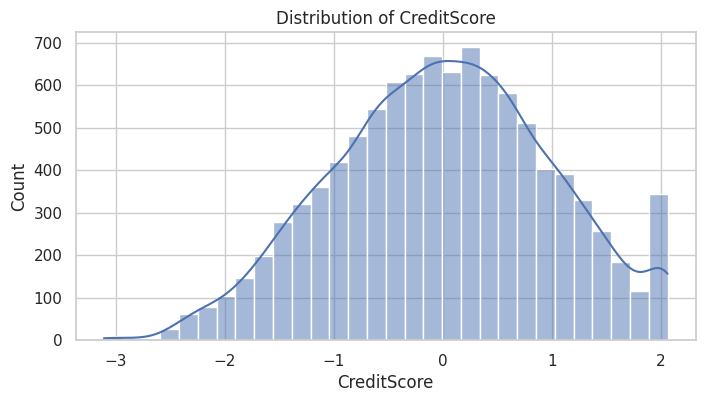

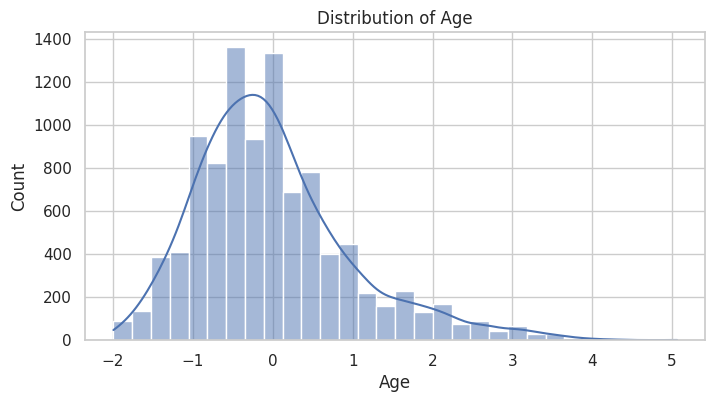

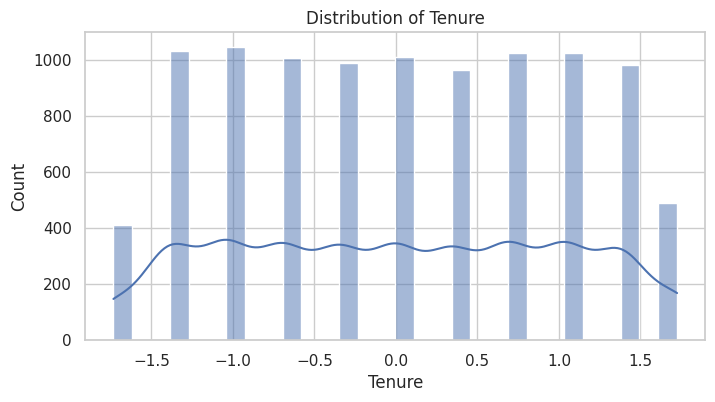

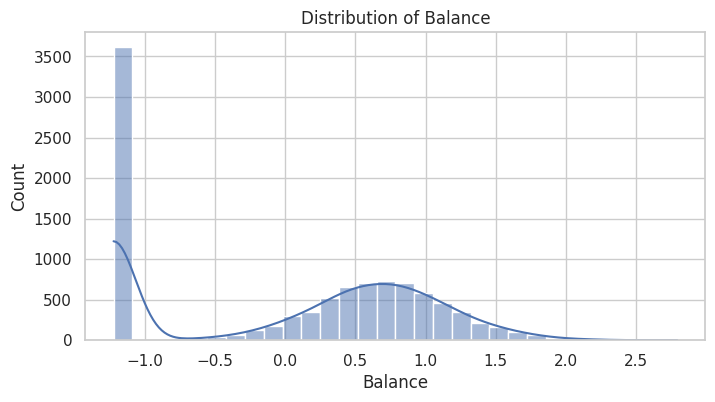

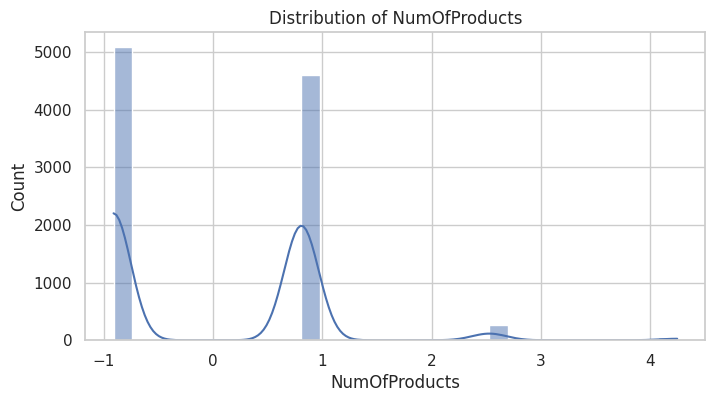

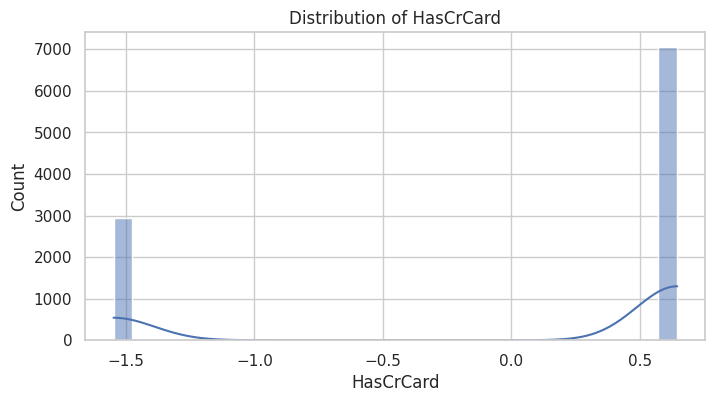

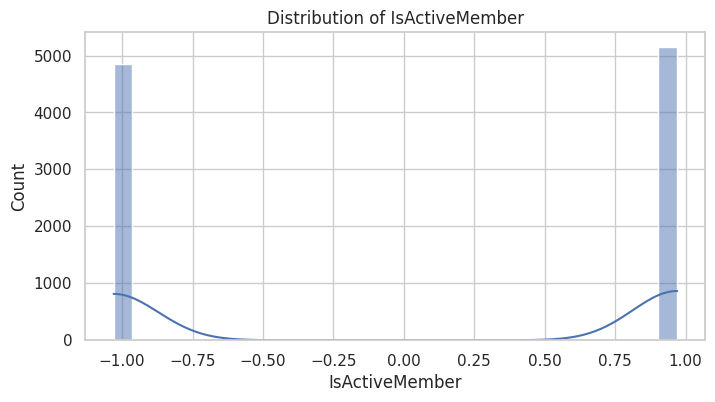

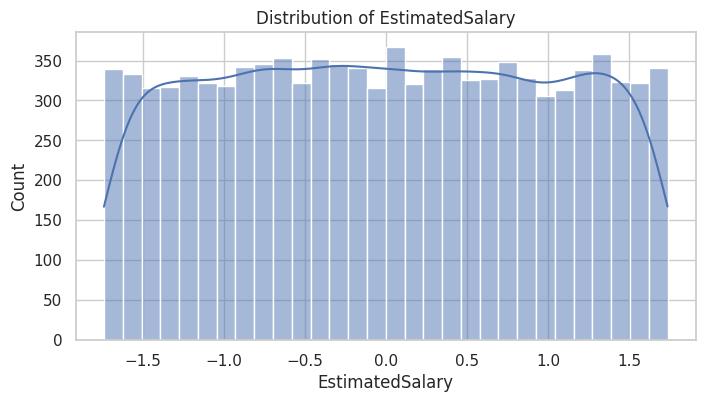

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Plotting histograms for numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


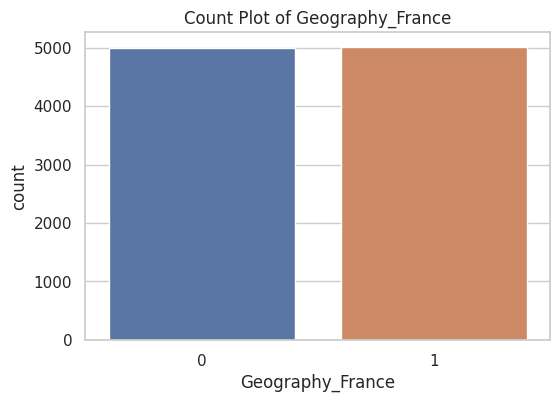

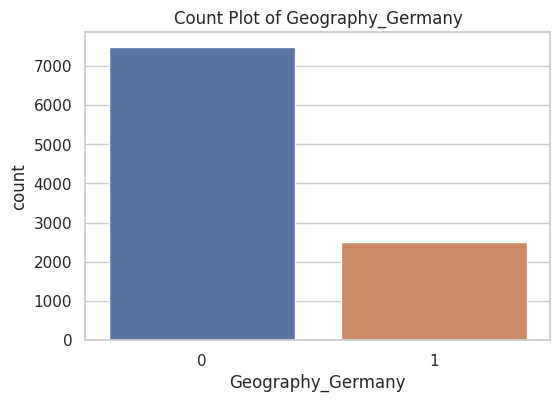

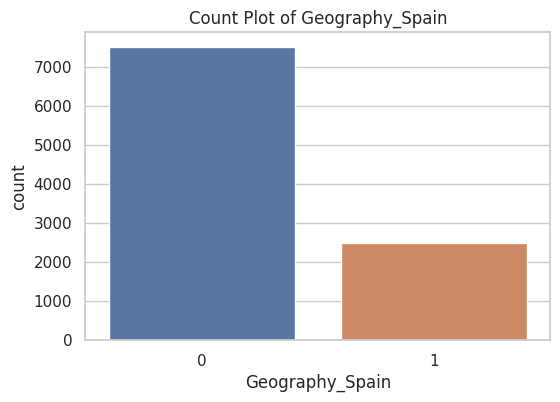

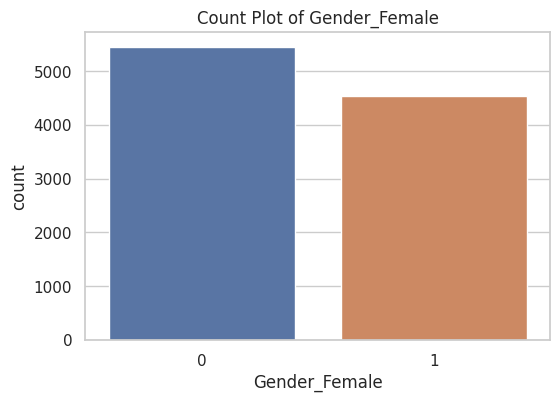

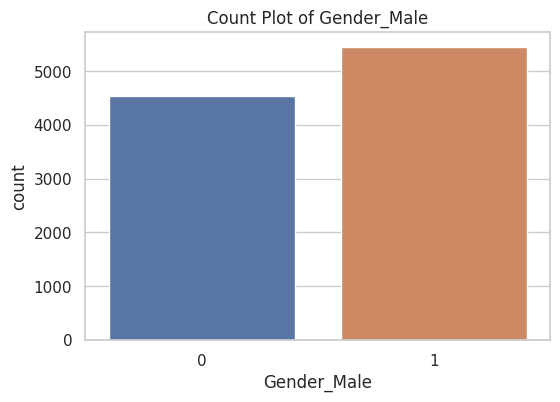

In [40]:
categorical_features = ['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']

# Plotting count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=dataset)
    plt.title(f'Count Plot of {feature}')
    plt.show()


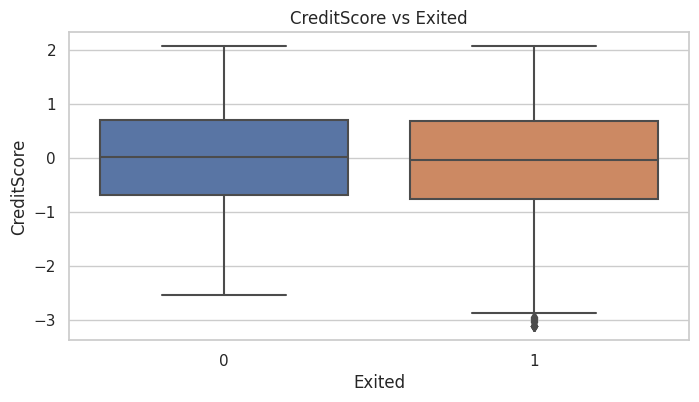

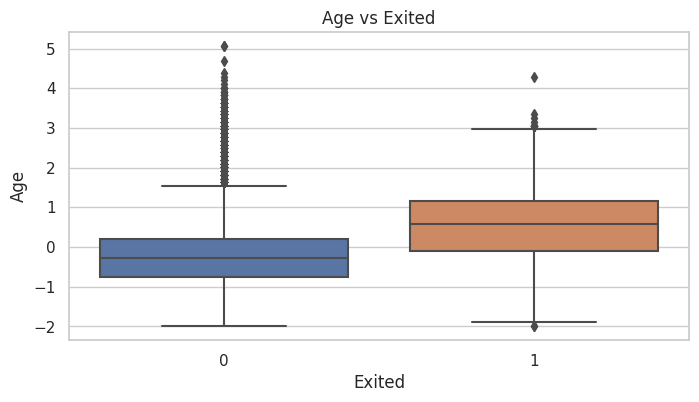

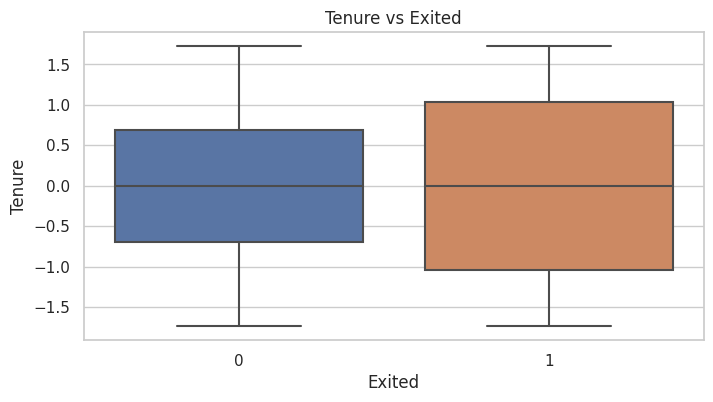

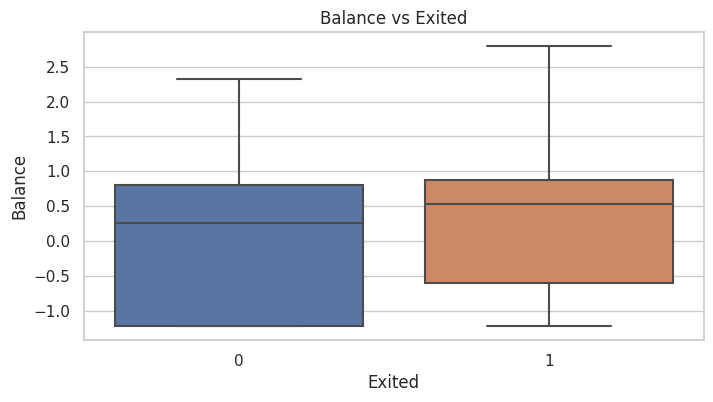

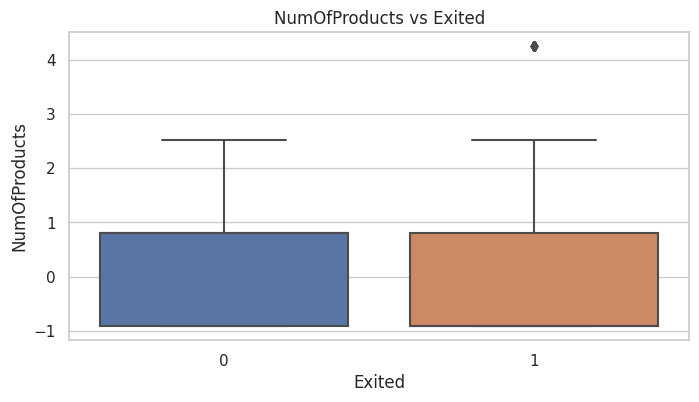

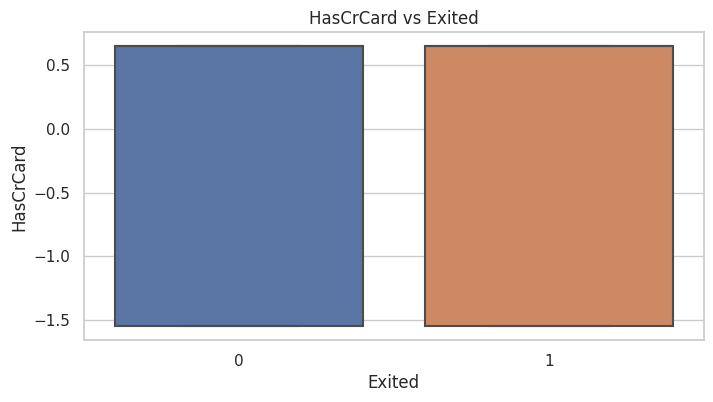

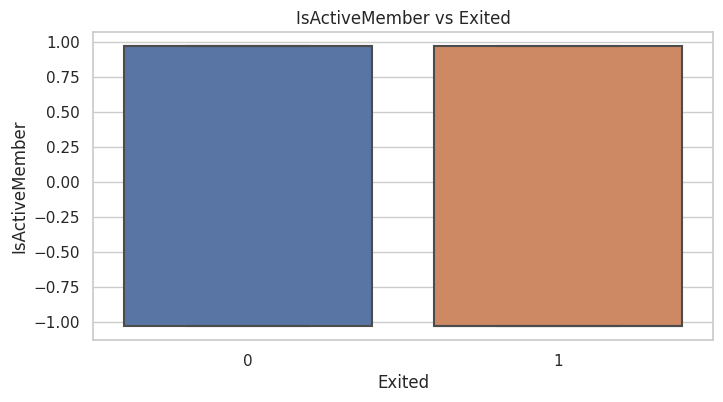

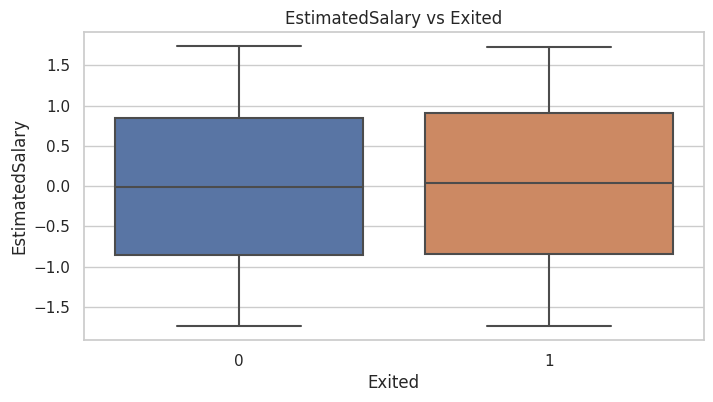

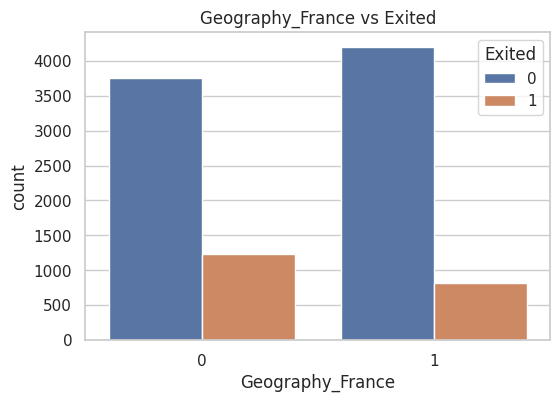

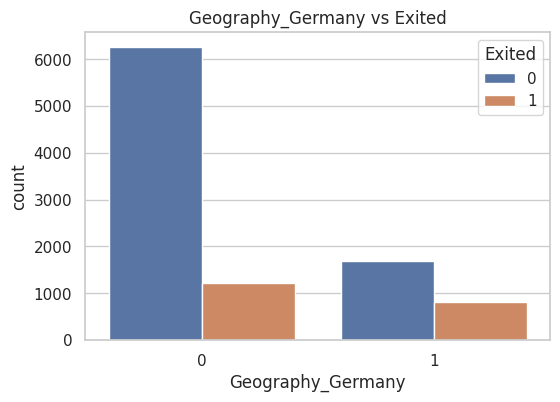

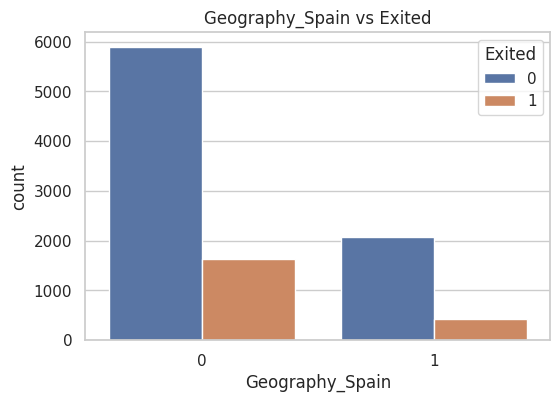

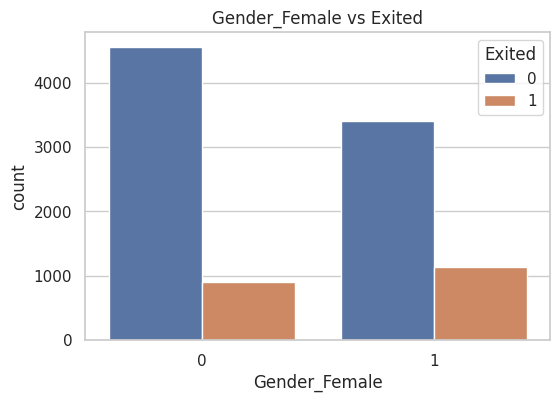

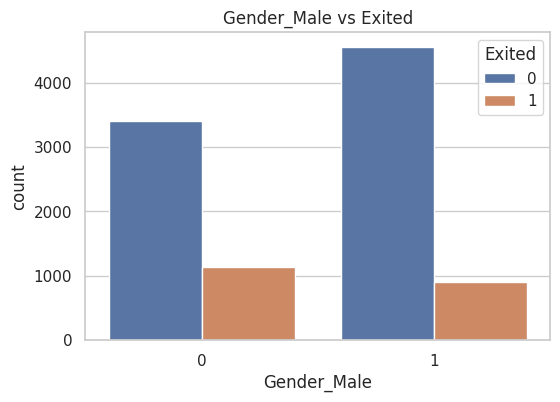

In [41]:
# Box plots for numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Exited', y=feature, data=dataset)
    plt.title(f'{feature} vs Exited')
    plt.show()

# Count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Exited', data=dataset)
    plt.title(f'{feature} vs Exited')
    plt.show()


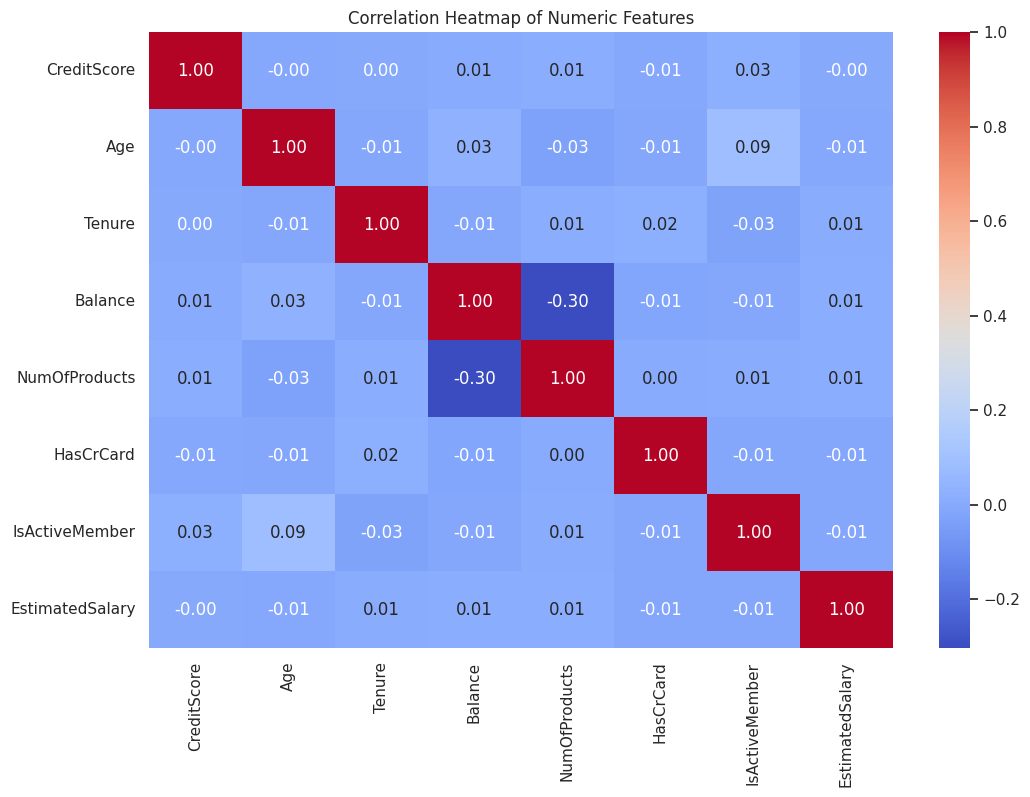

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset[numeric_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [47]:
# Sample a subset of the data for clearer visualization
sampled_data = dataset.sample(n=1000, random_state=42)  # Adjust the sample size as needed


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


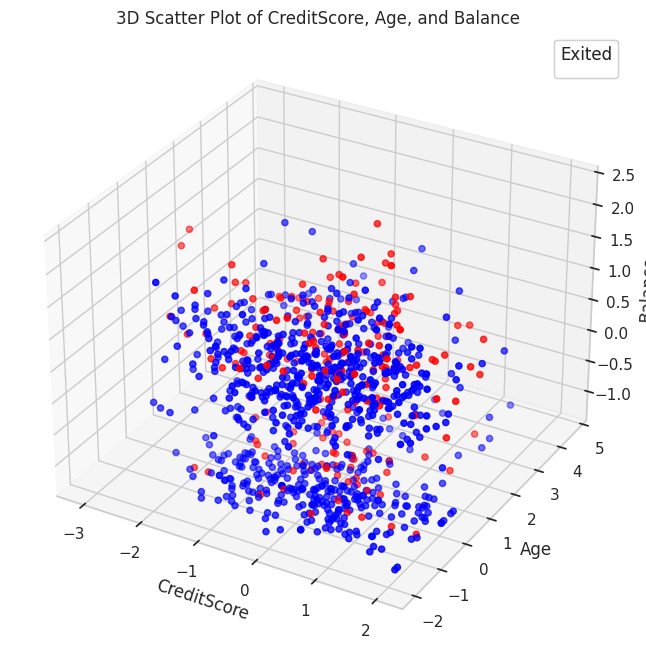

In [48]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define axes
x = sampled_data['CreditScore']
y = sampled_data['Age']
z = sampled_data['Balance']

# Use 'Exited' for color coding
colors = sampled_data['Exited'].map({0: 'blue', 1: 'red'})

# Create a scatter plot
scatter = ax.scatter(x, y, z, c=colors, marker='o')

# Creating a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Exited")
ax.add_artist(legend1)

# Set labels
ax.set_xlabel('CreditScore')
ax.set_ylabel('Age')
ax.set_zlabel('Balance')

plt.title('3D Scatter Plot of CreditScore, Age, and Balance')
plt.show()
